In [1]:
# 확률분포

# 동전을 한번 던져 나올수 있는 경우의 확률분포
# 앞 1/2, 뒤 1/2

# 동전을 두번 던져 나올수 있는 경우의 활률분포
# (앞, 앞), (앞, 뒤), (뒤, 앞), (뒤, 뒤)
#   1/4      1/4      1/4      1/4
# 앞의 값 1, 뒤의 값 0 일때 값의 합 분포
#    2,        1,      0
#   1/4       2/4     1/4

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def fact(n):
    ret = 1
    while n>1:
        ret *= n
        n -= 1
    return ret

def fact_r(n):
    if n==2:
        return n
    return fact_r(n-1)*n

def perm_f(n, r):
    return fact(n)/fact(n-r)

def combi_f(n, r):
    return fact(n)/(fact(n-r)*fact(r))

def count_with_replacement_order(pool, sel_count):  # all
    if sel_count == 1:
        return len(pool), [[x] for x in pool]
    a, b = count_with_replacement_order(pool, sel_count-1)
    r = []
    for x in pool:
        for b_i in b:
            r.append(b_i+[x])
    return len(r), r    

def perm_pool(pool, r):
    if r == 1:
        return len(pool), [[x] for x in pool]
    ret = []
    for x in pool:
        pool_copy = [y for y in pool]
        pool_copy.remove(x)
        a, b = perm_pool(pool_copy, r-1)
        for b_i in b:
            ret.append(b_i+[x])
    return len(ret), ret

def combi_pool(pool, r):
    a , b = perm_pool(pool, r)
    r = []
    for b_i in b:
        r.append(set(b_i))
    f = []
    for r_i in r:
        if r_i not in f:
            f.append(r_i)
    return len(f), f

def normal(x, mu=0, sigma=1):
    return (1/np.sqrt(2*np.pi)*sigma) * np.exp(-0.5*(((x-mu)/sigma)**2))

(4, [[1, 1], [0, 1], [1, 0], [0, 0]])
[[1 1]
 [0 1]
 [1 0]
 [0 0]]
[0 1 2]
[0.25 0.5  0.25]


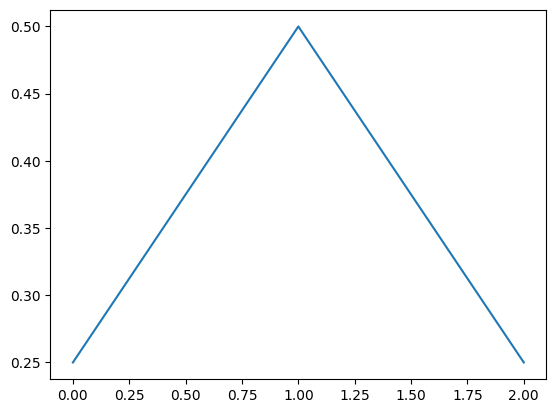

In [3]:
x = count_with_replacement_order([1,0], 2)
print(x)
x_array = np.array(x[1])
print(x_array)
x_array1 = np.sum(x_array, axis = 1)
x_array2 = np.unique(x_array1, return_counts = True)
print(x_array2[0])                   # x
print(x_array2[1] / len(x_array1))   # y

_, axe = plt.subplots()
axe.plot(x_array2[0], x_array2[1]/len(x_array1))

(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18]), array([ 1,  3,  6, 10, 15, 21, 25, 27, 27, 25, 21, 15, 10,  6,  3,  1],
      dtype=int64))


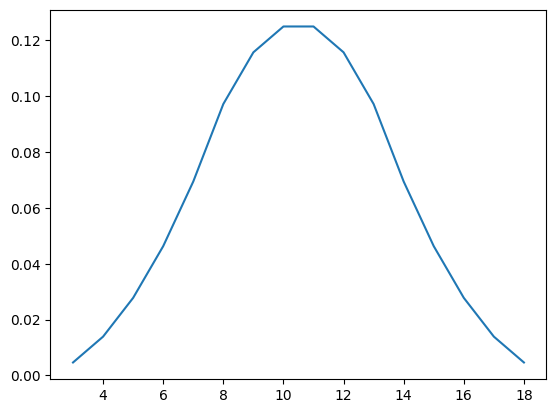

In [4]:
# 확률변수[주사위를 3번던져 나온 숫자의 합]의 확률분포
tot, counts = count_with_replacement_order([x for x in range(1,7)], 3)
# print(tot)
# print(counts)
counts_np = np.array(counts)
# print(counts_np)
pass1 = np.sum(counts_np, axis = 1)
# print(pass1)
pass2 = np.unique(pass1, return_counts = True)
print(pass2)

_, axe = plt.subplots()
axe.plot(pass2[0], pass2[1]/tot)

[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[  1  10  45 120 210 252 210 120  45  10   1]


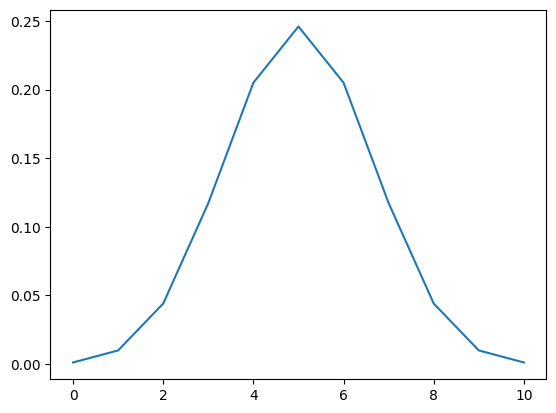

In [5]:
# 동전을 10번 던져(앞1, 뒤0) 나올수 있는 합의 분포
tot, dong = count_with_replacement_order([0,1], 10)
# print(tot)
# print(dong)

dong_np = np.array(dong)
pass1 = np.sum(dong_np , axis = 1)
print(pass2[0])
pass2 = np.unique(pass1, return_counts=True)
print(pass2[1])

_, axe = plt.subplots()
axe.plot(pass2[0], pass2[1]/tot)

In [6]:
# 동전을 던져, 앞면이 나오면 100원을 주고,
# 뒷면이 나오면 100원을 받기로 함.

# 앞면이 8번 나옴.
# 친구: 동전이 조작되지 않음. <-- 귀무가설
# 나: 동전이 아무래도 조작인것 같다. <-- 대립가설
# 유의 수준 5%에서 결정하자.

# print(pass2)
count2 = pass2[1]
print(count2)
print(np.sum(count2[-3:]/tot)) # <--- p-value
# 만약 p-value가 합의한 유의수준 5%보다 클경우,
# 발생가능한 일반적인 케이스이므로,
# 귀무가설을 수용,
# 만약 p-value가 합의한 유의수준 5%보다 작을경우,
# 희귀한 케이스에 속함로
# 귀무가설을 기각, 대립가설을 채택.

[  1  10  45 120 210 252 210 120  45  10   1]
0.0546875


[ 5  6  7 ... 28 29 30]
(array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30]), array([  1,   5,  15,  35,  70, 126, 205, 305, 420, 540, 651, 735, 780,
       780, 735, 651, 540, 420, 305, 205, 126,  70,  35,  15,   5,   1],
      dtype=int64))


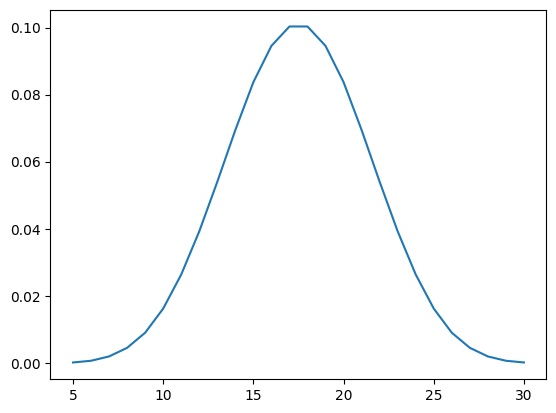

In [7]:
# 주사위를 5번 던졌을때,
# - 합이 25가 될 확률
# - 합이 25보다 크면, 100원을 받기로 하였다. 합이 25보다 클 확률은 (25 불포함.)
tot, counts = count_with_replacement_order([x for x in range(1,7)], 5)
# print(tot)
# print(dices)
np_counts = np.array(counts)
# print(np_dices)
pass1 = np.sum(np_counts, axis = 1)
print(pass1)
pass2 = np.unique(pass1, return_counts=True)
print(pass2)
_, axe = plt.subplots()
axe.plot(pass2[0], pass2[1]/tot)


값: [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30] 확률: [0.0001286  0.000643   0.00192901 0.00450103 0.00900206 0.0162037
 0.02636317 0.03922325 0.05401235 0.06944444 0.08371914 0.0945216
 0.10030864 0.10030864 0.0945216  0.08371914 0.06944444 0.05401235
 0.03922325 0.02636317 0.0162037  0.00900206 0.00450103 0.00192901
 0.000643   0.0001286 ]
25필터: [25]
확률: [0.0162037]
25 보다 큰것: [26 27 28 29 30]
확률: [0.00900206 0.00450103 0.00192901 0.000643   0.0001286 ]
합: 0.016203703703703703


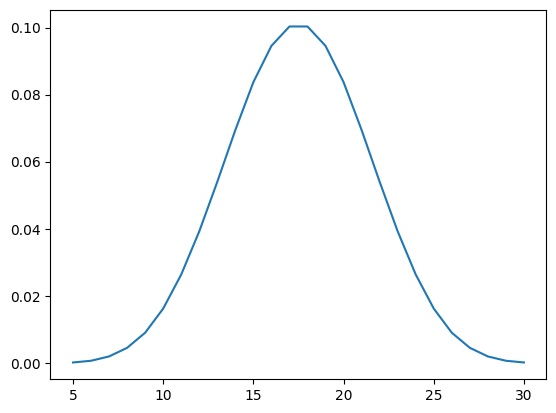

In [11]:
v = pass2[0]
prob = pass2[1]/tot
print('값:', v, '확률:', prob)
assert np.sum(prob) == 1.0

index_25 = v==25
print('25필터:', v[index_25])
print('확률:',prob[index_25])

index_25H = v>25
print('25 보다 큰것:', v[index_25H])
print('확률:',prob[index_25H])
print('합:',np.sum(prob[index_25H]))


_, axe = plt.subplots()
axe.plot(v, prob)

17.5 3.8188130791298667


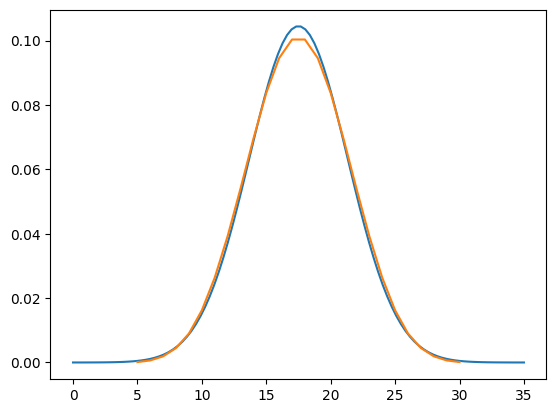

In [13]:
xs = np.linspace(0,35,100)
# xs = np.linspace(-5,5,100)
mu = np.mean(pass1)
sig = np.std(pass1)
print(mu,sig)
from scipy import stats

_,axe = plt.subplots()
axe.plot(xs,stats.norm.pdf(xs,loc=mu,scale=sig))
axe.plot(v,prob)